Based on https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [1]:
import pandas as pd
tahini_dataframe = pd.read_csv('./salted-tahini-chocolate-chip-cookies-with-sentiment.csv')
tahini_dataframe.head()


,user,comment,sentiment
0,lmk,Yum. These took much longer than 16 minutes t...,pos
1,Sonya,If you follow the recipe as written the tahini...,pos
2,KV,I have made these cookies 5 times. My advice i...,pos
3,MaryN,I liked this- the tahini is slightly more subt...,pos
4,Maggie B,Used Shaila M's tweaks. Baked first tray strai...,pos


In [2]:
tahini_dataframe['comment_lower'] = tahini_dataframe['comment'].str.lower()

In [3]:
comment_df = tahini_dataframe['comment_lower']
comment_df.sample(n=10)

283    not very impressed.  i followed this recipe to...
99                              more tahini?\nless chips
140    i made these, and tried to bake until i got th...
258    i only refrigerated the dough for three hours,...
98                        next time do not cook so long!
212    i tried these, following the recipe exactly. t...
1      if you follow the recipe as written the tahini...
0      yum.  these took much longer than 16 minutes t...
209    i’ve made these several times and they are a h...
138    as written, this makes a solid chocolate chip ...
Name: comment_lower, dtype: object

In [4]:
import re
#The regex pattern [^\w\s] captures everything which is not a word or whitespace(i.e. the punctuations) and replaces it with an empty string.

In [5]:
comments_re = [re.sub(r'[^\w\s]', ' ', comment) for comment in tahini_dataframe['comment_lower'].values]

# comments_re

In [6]:
# import string
## https://www.programiz.com/python-programming/methods/string/translate
## https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
## string.punctuation returns all sets of punctuation.
## https://www.geeksforgeeks.org/string-punctuation-in-python/

# comments_no_punc = [comment.translate(str.maketrans('', '', string.punctuation)) for comment in tahini_dataframe['comment_lower'].values]
# comment_df = pd.Series(comments_no_punc)

# comment_df.sample(n=30)

In [7]:
comment_df = pd.Series(comments_re)
comment_df.sample(10)

211                                   yuh uh mee        
296    did a test  baked 1 3 of the cookies after the...
235    i made these and followed the suggestion of a ...
23     made exactly as recipe instructs and they are ...
21     add more tahini and less chocolate chips\ntry ...
212    i tried these  following the recipe exactly  t...
302    these cookies were fantastic  just the right a...
301    i replaced the butter with coconut oil and the...
230    reduce sugar to 160 170g\nincrease tahini to 1...
213    these cookies are delightful  my 14 year old s...
dtype: object

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

#### Top Stopwords Barchart

`stopwords.words('english')` is a list of common English words like I, because, to, etc. called _stopwords_ that we will want to exclude from our analysis. 

In [9]:
comment_df.str.split().values.tolist()

[['yum',
  'these',
  'took',
  'much',
  'longer',
  'than',
  '16',
  'minutes',
  'to',
  'cook',
  'but',
  'i',
  'm',
  'also',
  'in',
  'denver',
  '5000',
  'ft',
  'altitude',
  'and',
  'used',
  'a',
  'gluten',
  'free',
  'flour',
  'blend',
  'either',
  'or',
  'both',
  'of',
  'those',
  'could',
  'have',
  'affected',
  'the',
  'outcome'],
 ['if',
  'you',
  'follow',
  'the',
  'recipe',
  'as',
  'written',
  'the',
  'tahini',
  'sesame',
  'flavour',
  'in',
  'the',
  'cookies',
  'is',
  'very',
  'subtle',
  'if',
  'i',
  'didn',
  't',
  'know',
  'it',
  'was',
  'there',
  'i',
  'wouldn',
  't',
  'have',
  'tasted',
  'it',
  'i',
  'got',
  'the',
  'same',
  'feedback',
  'from',
  'the',
  'people',
  'i',
  'shared',
  'the',
  'cookies',
  'with',
  'that',
  'being',
  'said',
  'they',
  'are',
  'still',
  'absolutely',
  'delicious',
  'cookies'],
 ['i',
  'have',
  'made',
  'these',
  'cookies',
  '5',
  'times',
  'my',
  'advice',
  'is',


In [10]:
def plot_top_stopwords_barchart(text, recipe_name):
    stops = set(stopwords.words('english'))
    
    # convert each comment string into a list of strings
    # split at each word using 
    # comment_df.str.split()
    # then .values makes it an np array
    # then .tolist() converts that to a list
    
    # we'll have a list of lists, where each list 
    # is a list of strings that are the words in each comment
    # This is equivalent to tokenizing the comment?
    comments_as_lists = comment_df.str.split().values.tolist()
    
    corpus = [word for comment in comments_as_lists for word in comment]
    
    from collections import defaultdict
    
    dic = defaultdict(int)
    
    for word in corpus:
        if word in stops:
            dic[word]+=1
            
    top_stopwords = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
    x,y = zip(*top_stopwords)
    
    plt.bar(x,y)
    plt.xlabel('stopword', fontsize=14)
    plt.ylabel('number of occurrences', fontsize=14)
    plt.title('Top 10 occuring stopwords in the '+recipe_name+' comments', fontsize=14)
    

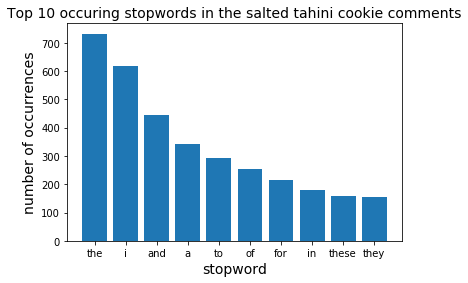

In [11]:
plot_top_stopwords_barchart(comment_df, 'salted tahini cookie')

#### Top Non-Stopwords Barchart

In [12]:
import seaborn as sns
sns.set_style("whitegrid")

In [13]:
from collections import Counter

In [14]:
def plot_top_non_stopwords_barchart(text, recipe_name, num_words=40):
    stops = set(stopwords.words('english'))
    
    comments_as_lists = comment_df.str.split().values.tolist()
    corpus = [word for comment in comments_as_lists for word in comment]
    
    counter = Counter(corpus)
    
    most_occurring = counter.most_common()
    
    x,y = [], []
    
    for word, count in most_occurring[:num_words]:
        if word not in stops:
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y, y=x)
    
    plt.xlabel('non-stopword', fontsize=14)
    plt.ylabel('number of occurrences', fontsize=14)
    plt.title('Top occurring non-stopwords in the '+recipe_name+' comments', fontsize=14)


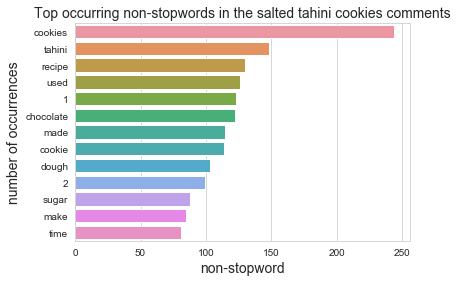

In [15]:
plot_top_non_stopwords_barchart(comment_df, 'salted tahini cookies')

#### Text Sentiment

In [16]:
from textblob import TextBlob

def plot_polarity_histogram(text, recipe_name='recipe'):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
    
    polarity_score = text.apply(lambda x : _polarity(x))
    
    polarity_score.hist()
    
    plt.xlabel('sentiment polarity', fontsize =14)
    plt.ylabel('number of comments', fontsize =14)
    plt.title('(Nieve) sentiment polarity of '+recipe_name+' comments', fontsize=14)

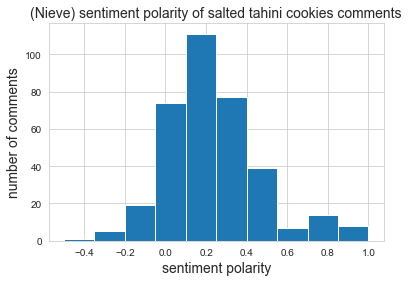

In [17]:
plot_polarity_histogram(comment_df, 'salted tahini cookies')

#### Sentiment Barchart

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    sent_score = sid.polarity_scores(text)
    sent_score.pop('compound')
    return max(sent_score, key=sent_score.get)

def plot_sentiment_barchart(text, recipe_name='recipe'):
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    
    plt.bar(sentiment.value_counts().index, sentiment.value_counts())
    
    plt.xlabel("sentiment value", fontsize=14)
    plt.ylabel("number of comments", fontsize=14)
    
    plt.title("Sentiment barchart for "+recipe_name+' comments', fontsize=14)

/Users/Nida/opt/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Nida/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


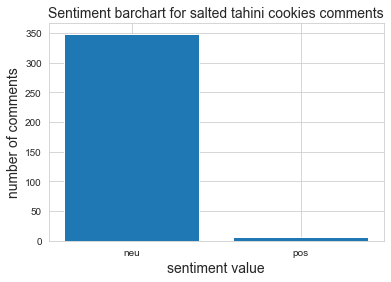

In [19]:
plot_sentiment_barchart(comment_df, 'salted tahini cookies')

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    stops = set(stopwords.words('english'))
    corpus=[]
    lem=WordNetLemmatizer()
    for comment in text:
        words=[w for w in word_tokenize(comment) if (w not in stops)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
#         words=[regex_tokenizer.tokenize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus = preprocess_text(comment_df)
corpus

[['yum',
  'took',
  'much',
  'longer',
  'minute',
  'cook',
  'also',
  'denver',
  '5000',
  'altitude',
  'used',
  'gluten',
  'free',
  'flour',
  'blend',
  'either',
  'could',
  'affected',
  'outcome'],
 ['follow',
  'recipe',
  'written',
  'tahini',
  'sesame',
  'flavour',
  'cooky',
  'subtle',
  'know',
  'tasted',
  'got',
  'feedback',
  'people',
  'shared',
  'cooky',
  'said',
  'still',
  'absolutely',
  'delicious',
  'cooky'],
 ['made',
  'cooky',
  'time',
  'advice',
  'everything',
  'recipe',
  'say',
  'tell',
  'step',
  'father',
  'used',
  'tahini',
  'tell',
  'world',
  'best',
  'cooky',
  'ever',
  'fantastic',
  'wish',
  'someone',
  'told',
  'earlier',
  'life',
  'refrigerating',
  'dough',
  'made',
  'whole',
  'experience',
  'relaxing',
  'make',
  'dough',
  'put',
  'fridge',
  'clean',
  'make',
  'cooky',
  'next',
  'day',
  'eat',
  'dish'],
 ['liked',
  'tahini',
  'slightly',
  'subtle',
  'cookie',
  'combined',
  'dark',
  'chocol

In [21]:
# from nltk import RegexpTokenizer
# word_tokenize('.that-')
# regex_tokenizer = nltk.RegexpTokenizer(r"\w+")
# regex_tokenizer.tokenize('.that-')

#### Top n-grams Barchart

In [22]:
import itertools
# corpus
# print(list(itertools.chain.from_iterable(corpus)))

In [23]:
def get_top_m_ngrams(tokenized_comments, n=2, m=12):
    words = list(itertools.chain.from_iterable(tokenized_comments))
    top_m_ngrams = pd.Series(nltk.ngrams(words, n)).value_counts()[:m]
    return top_m_ngrams

# top_m_ngrams = get_top_m_ngrams(corpus, n=2, m=12)
# top_m_ngrams.index.values
# [' '.join(ngram) for ngram in top_m_ngrams.index.values]

In [24]:
def plot_top_m_ngrams(tokenized_comments, recipe_name='recipe', n=2, m=12):
    top_m_ngrams = get_top_m_ngrams(tokenized_comments, n, m)

    top_m_grams = top_m_ngrams.sort_values()
    
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    
    sns.barplot(top_m_ngrams.values, [' '.join(ngram) for ngram in top_m_ngrams.index.values])
    
    
    plt.xlabel('# of occurrences', fontsize=16)
    plt.ylabel(str(n)+'-gram', fontsize=16)
    plt.title(str(m)+' most frequently occurring '+str(n)+'-grams in '+recipe_name+' comments', fontsize=16)

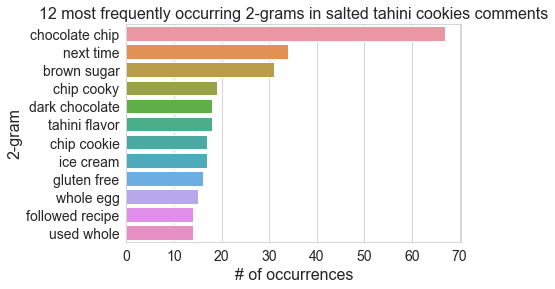

In [25]:
plot_top_m_ngrams(corpus, 'salted tahini cookies', n=2, m=12)

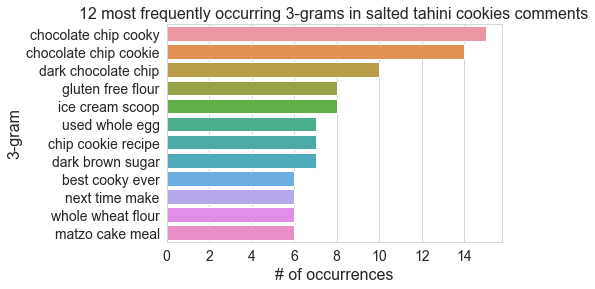

In [26]:
n=3
m=12
plot_top_m_ngrams(corpus, 'salted tahini cookies', n, m)
    

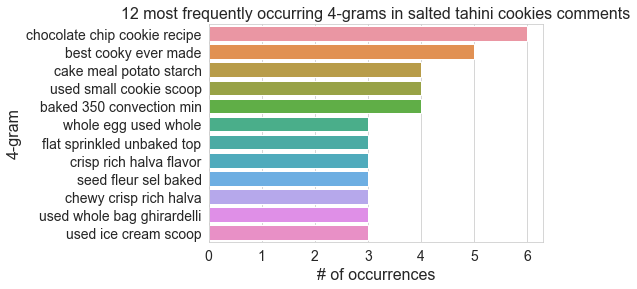

In [27]:
n=4
m=12
plot_top_m_ngrams(corpus, 'salted tahini cookies', n, m)


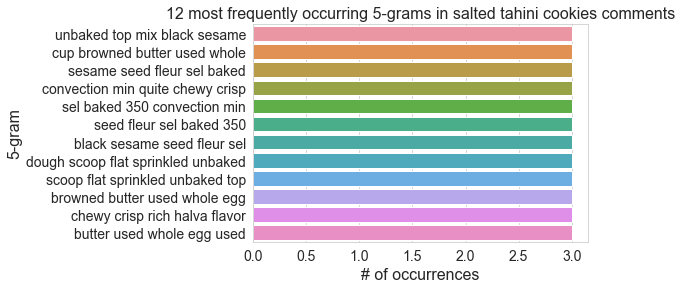

In [28]:
n=5
m=12
plot_top_m_ngrams(corpus, 'salted tahini cookies', n, m)


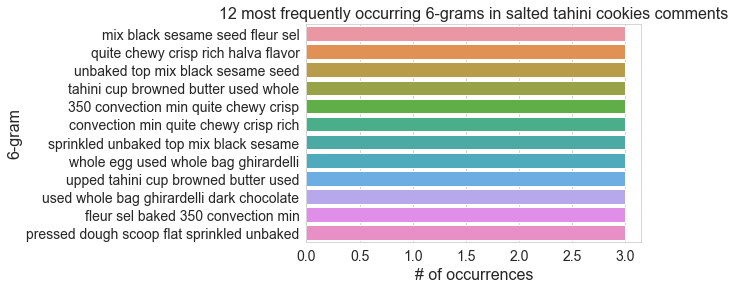

In [29]:
n=6
m=12
plot_top_m_ngrams(corpus, 'salted tahini cookies', n, m)


#### Top n-grams, without lemmatization

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text_no_lemmatize(text):
    stops = set(stopwords.words('english'))
    corpus=[]
    lem=WordNetLemmatizer()
    for comment in text:
        words=[w for w in word_tokenize(comment) if (w not in stops)]
#         words=[lem.lemmatize(w) for w in words if len(w)>2]
#         words=[regex_tokenizer.tokenize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus_no_lemmatize = preprocess_text_no_lemmatize(comment_df)
corpus_no_lemmatize

[['yum',
  'took',
  'much',
  'longer',
  '16',
  'minutes',
  'cook',
  'also',
  'denver',
  '5000',
  'ft',
  'altitude',
  'used',
  'gluten',
  'free',
  'flour',
  'blend',
  'either',
  'could',
  'affected',
  'outcome'],
 ['follow',
  'recipe',
  'written',
  'tahini',
  'sesame',
  'flavour',
  'cookies',
  'subtle',
  'know',
  'tasted',
  'got',
  'feedback',
  'people',
  'shared',
  'cookies',
  'said',
  'still',
  'absolutely',
  'delicious',
  'cookies'],
 ['made',
  'cookies',
  '5',
  'times',
  'advice',
  'everything',
  'recipe',
  'says',
  'tell',
  'step',
  'father',
  'used',
  'tahini',
  'tell',
  'world',
  'best',
  'cookies',
  'ever',
  'fantastic',
  'wish',
  'someone',
  'told',
  'earlier',
  'life',
  'refrigerating',
  'dough',
  'made',
  'whole',
  'experience',
  'relaxing',
  'make',
  'dough',
  'put',
  'fridge',
  'clean',
  'make',
  'cookies',
  'next',
  'day',
  'eat',
  'dishes'],
 ['liked',
  'tahini',
  'slightly',
  'subtle',
  'pb

In [31]:
def plot_top_m_ngrams_lem(tokenized_comments, recipe_name='recipe', n=2, m=12):
    top_m_ngrams = get_top_m_ngrams(tokenized_comments, n, m)

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    
    top_m_grams = top_m_ngrams.sort_values()
    sns.barplot(top_m_ngrams.values, [' '.join(ngram) for ngram in top_m_ngrams.index.values])
    
    plt.xlabel('# of occurrences', fontsize=16)
    plt.ylabel(str(n)+'-gram', fontsize=16)
    plt.title(str(m)+' most frequently occurring '+str(n)+'-grams in lemmatized '+recipe_name+' comments', fontsize=16)

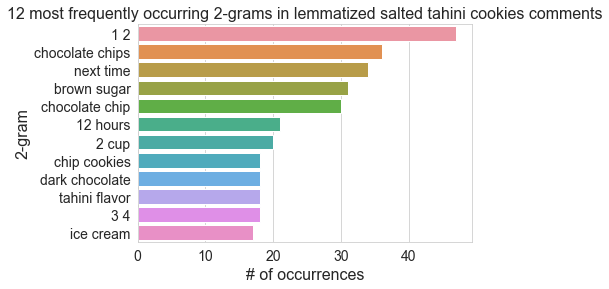

In [32]:
n=2
m=12
plot_top_m_ngrams_lem(corpus_no_lemmatize, 'salted tahini cookies', n, m)

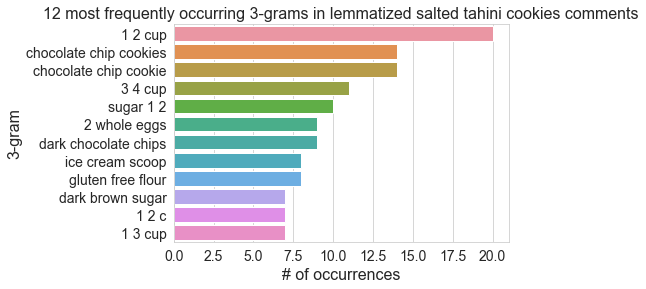

In [33]:
n+=1
plot_top_m_ngrams_lem(corpus_no_lemmatize, 'salted tahini cookies', n, m)

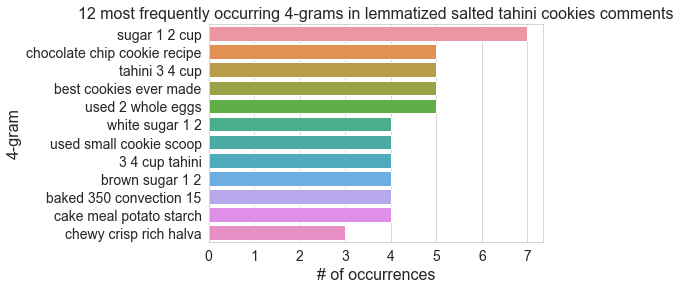

In [34]:
n+=1
plot_top_m_ngrams_lem(corpus_no_lemmatize, 'salted tahini cookies', n, m)

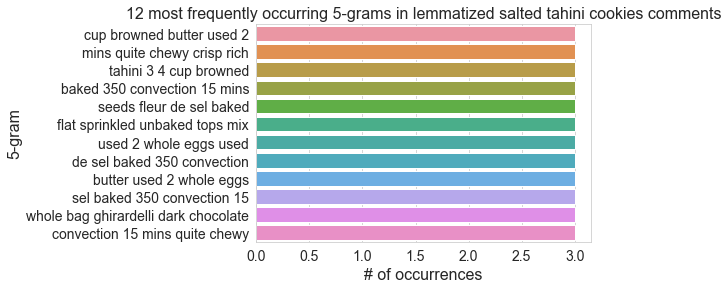

In [35]:
n+=1
plot_top_m_ngrams_lem(corpus_no_lemmatize, 'salted tahini cookies', n, m)

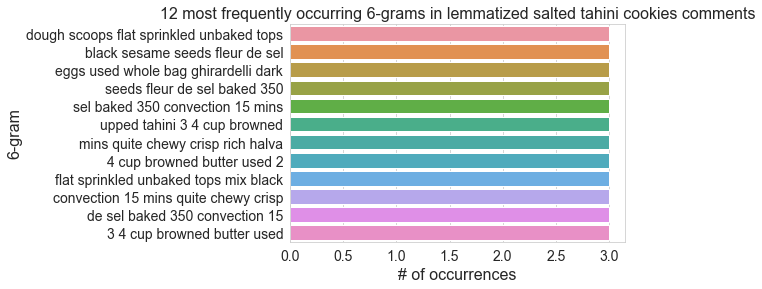

In [36]:
n+=1
plot_top_m_ngrams_lem(corpus_no_lemmatize, 'salted tahini cookies', n, m)